# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [4]:
def apply_svd_custom(X_train, X_test, n_components):
    # Center the data
    X_train_centered = X_train - np.mean(X_train, axis=0)
    X_test_centered = X_test - np.mean(X_test, axis=0)

    # Calculate the covariance matrix of the training data
    covariance_matrix = np.dot(X_train_centered.T, X_train_centered) / (X_train.shape[0] - 1)

    # Perform eigendecomposition on the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sort eigenvectors based on the sorted order of eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top 'n_components' eigenvectors
    U_reduced = eigenvectors[:, :n_components]

    # Project the centered data onto the new lower-dimensional space
    X_train_svd = np.dot(X_train_centered, U_reduced)
    X_test_svd = np.dot(X_test_centered, U_reduced)

    return X_train_svd, X_test_svd, U_reduced





## Part 3: Train Logistic Regression and Measure Performance

In [5]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time



## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [8]:
svd_components = [10, 25, 50, 100, 250] # You need to decide what number to search...

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd, sorted_eigenvectors = apply_svd_custom(X_train, X_test, n_components)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    results.append((n_components, accuracy, training_time))

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 10 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8041, Training time: 2.9491 seconds
Applying custom SVD with 25 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 25, Accuracy: 0.8859, Training time: 5.9045 seconds
Applying custom SVD with 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9082, Training time: 14.9681 seconds
Applying custom SVD with 100 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9173, Training time: 45.5452 seconds
Applying custom SVD with 250 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 250, Accuracy: 0.9215, Training time: 140.3387 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


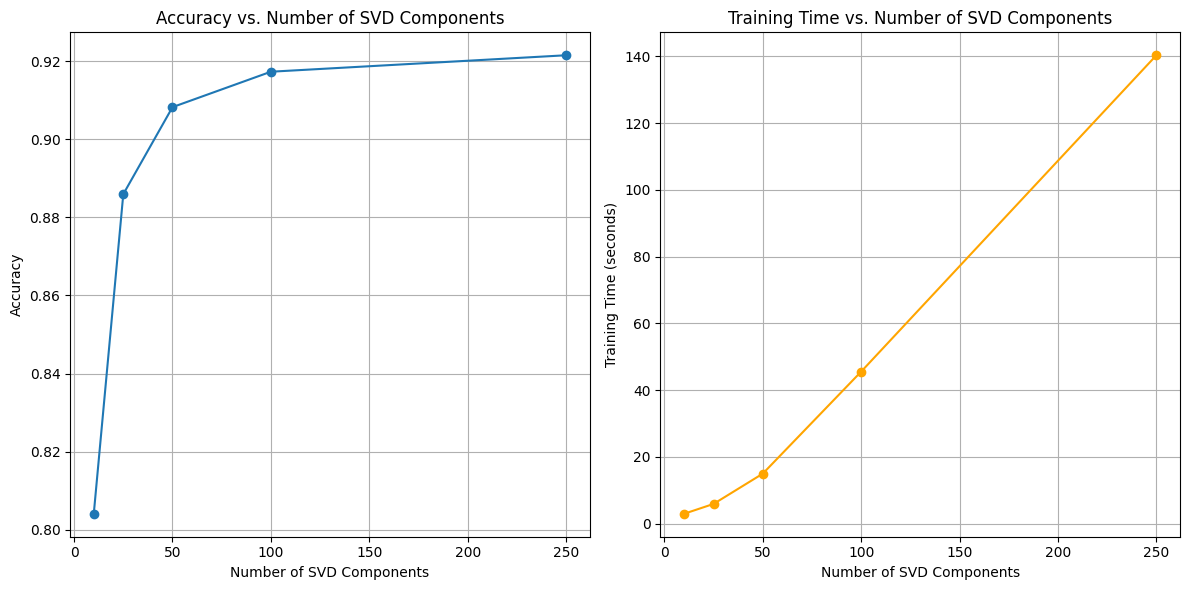

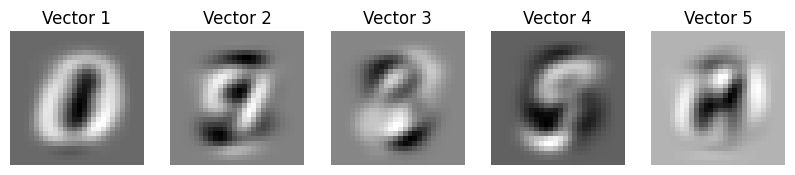

In [10]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
components = [result[0] for result in results]
accuracies = [result[1] for result in results]
training_times = [result[2] for result in results]

# Plot Accuracy vs. SVD Components
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o')
plt.title('Accuracy vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot Training Time vs. SVD Components
plt.subplot(1, 2, 2)
plt.plot(components, training_times, marker='o', color='orange')
plt.title('Training Time vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.grid(True)

plt.tight_layout()
plt.show()


def visualize_top_singular_vectors(singular_vectors, n_vectors=5):
    # We assume the singular vectors are columns in the matrix
    plt.figure(figsize=(10, 2))
    for i in range(n_vectors):
        vector = singular_vectors[:, i].reshape(28, 28)  # Reshape to 28x28 image
        plt.subplot(1, n_vectors, i + 1)
        plt.imshow(vector, cmap='gray')
        plt.axis('off')
        plt.title(f"Vector {i+1}")
    plt.show()

# Assuming 'sorted_eigenvectors' contains the eigenvectors from your SVD step
visualize_top_singular_vectors(sorted_eigenvectors)




Analyze/Conclusions:


In the graph with Accuracy vs. Number of SVD Components, there is a sharp Initial Increase where The accuracy of the model quickly improves as the number of SVD components increases, showing a rapid rise between 0 and around 50 components.It then plateau in Accuracy: Beyond 100 components, the accuracy reaches a peak of around 92% and then plateaus, showing little improvement even when more components are added. The relationship in Training Time vs. Number of SVD Components is linear. This means that 100 components is a good balance between accuracy and training time making the optimal number of components